### 評価指標の類を確率分布で理解

In [1]:
import numpy as np
import pandas as pd

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_formats = {'png', 'retina'}

from scipy.stats import norm

### 超基本的な状況

正規分布2つ。比較的比較的分離可能な状況。均等的なデータ。

In [2]:
gaussN=norm(loc=-1)
gaussP=norm(loc=1)
def p_y_given_x(x,pi):
    return pi*gaussP.pdf(x)/((1-pi)*gaussN.pdf(x)+pi*gaussP.pdf(x))

In [3]:
def show_px(pi:float):
    x=np.linspace(-3.5,3.5)
    plt.plot(x, (1-pi)*gaussN.pdf(x), c='C0')
    plt.plot(x, pi*gaussP.pdf(x), c='C1')
    plt.plot(x, (1-pi)*gaussN.pdf(x)+pi*gaussP.pdf(x), c='C2')
#     plt.plot(x,p_y_given_x(x,pi), c='gray')
    plt.ylim(-0.01,0.5)
#     plt.show()

In [4]:
def conf_mat(thre:float, pi:float):
    TP=pi*(gaussP.cdf(1e10)-gaussP.cdf(thre))
    TN=(1-pi)*(gaussN.cdf(thre)-gaussN.cdf(-1e10))
    FP=(1-pi)*(gaussN.cdf(1e10)-gaussN.cdf(thre))
    FN=pi*(gaussP.cdf(thre)-gaussP.cdf(-1e10))
    return TP,TN,FP,FN

def print_metrics(TP,TN,FP,FN):
    acc=(TP+TN)/(TP+TN+FP+FN)
    recall=TP/(TP+FN)
    precision=TP/(TP+FP)
    f1=TP/(TP+0.5*(FN+FP))
#     print(f1,2/(1/recall + 1/precision))
    print(f'TP:{TP:.4f} TN:{TN:.4f} FP:{FP:.4f} FN:{FN:.4f}')
    print(f'正解率:\t\t{acc:.4f}')
    print(f'Recall:\t\t{recall:.4f}')
    print(f'Precision:\t{precision:.4f}')
    print(f'F1 score:\t{f1:.4f}')

TP:0.4207 TN:0.4207 FP:0.0793 FN:0.0793
正解率:		0.8413
Recall:		0.8413
Precision:	0.8413
F1 score:	0.8413


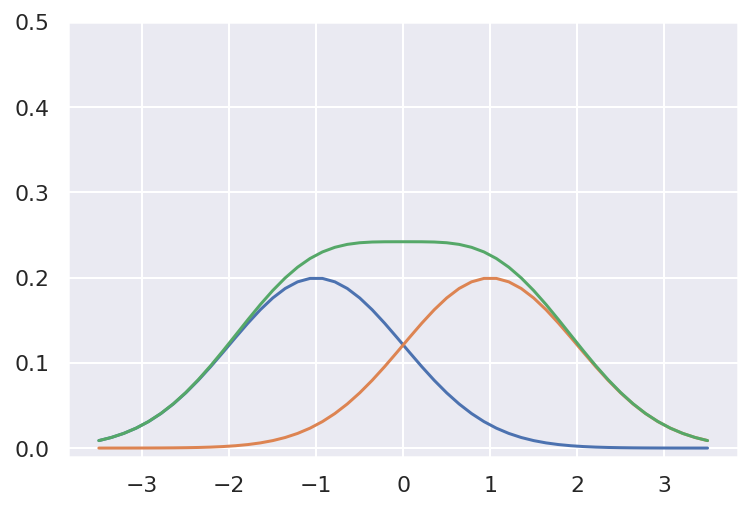

In [5]:
show_px(0.5)
print_metrics(*conf_mat(0,0.5))

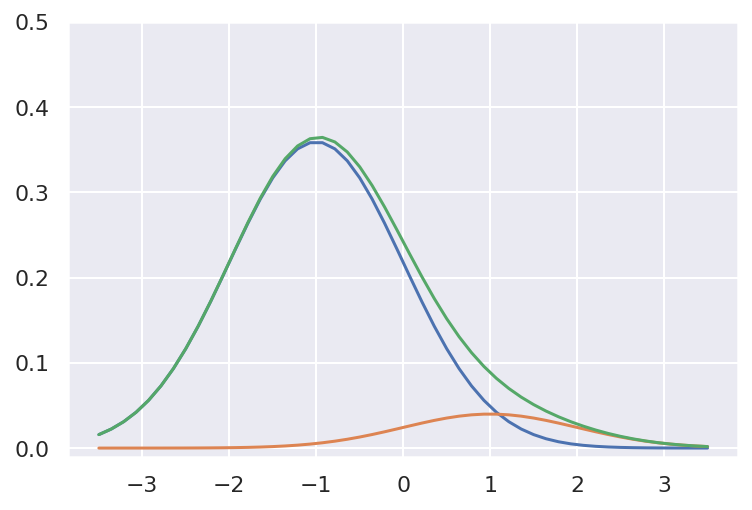

In [6]:
show_px(0.1)

(0.0, 0.001)

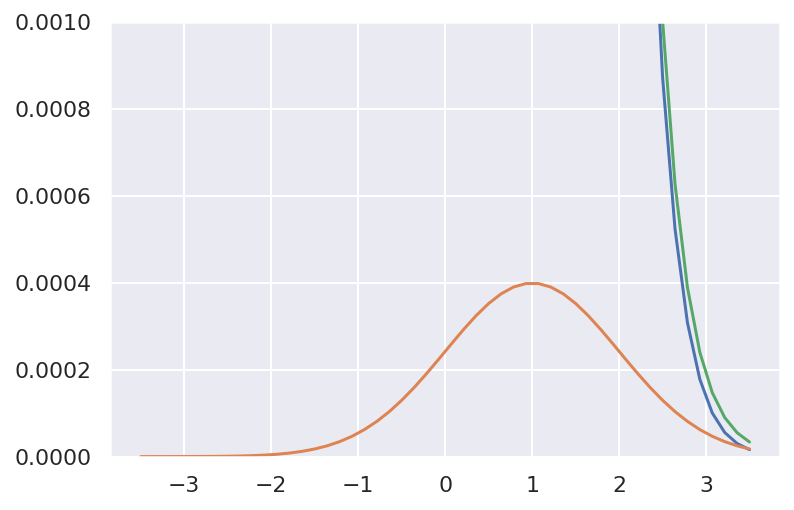

In [7]:
show_px(0.001)
plt.ylim(0,0.001)

(0.0, 0.001)

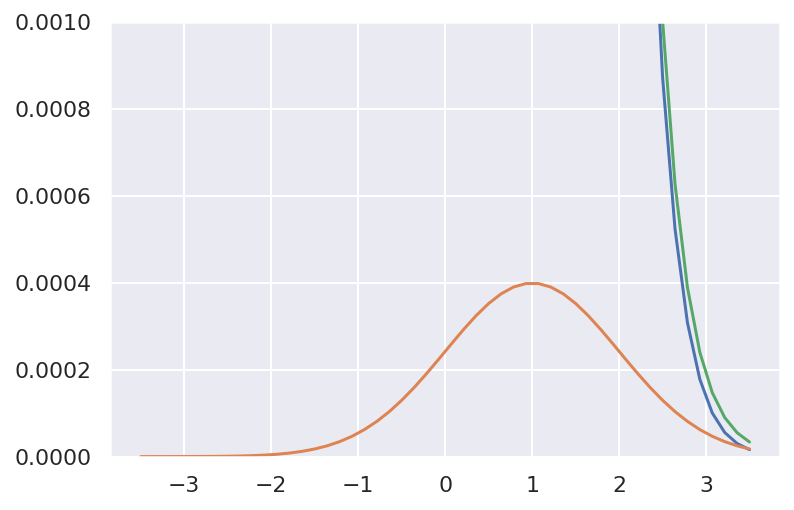

In [8]:
show_px(0.001)
plt.ylim(0,0.001)